In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme(font_scale = 2)

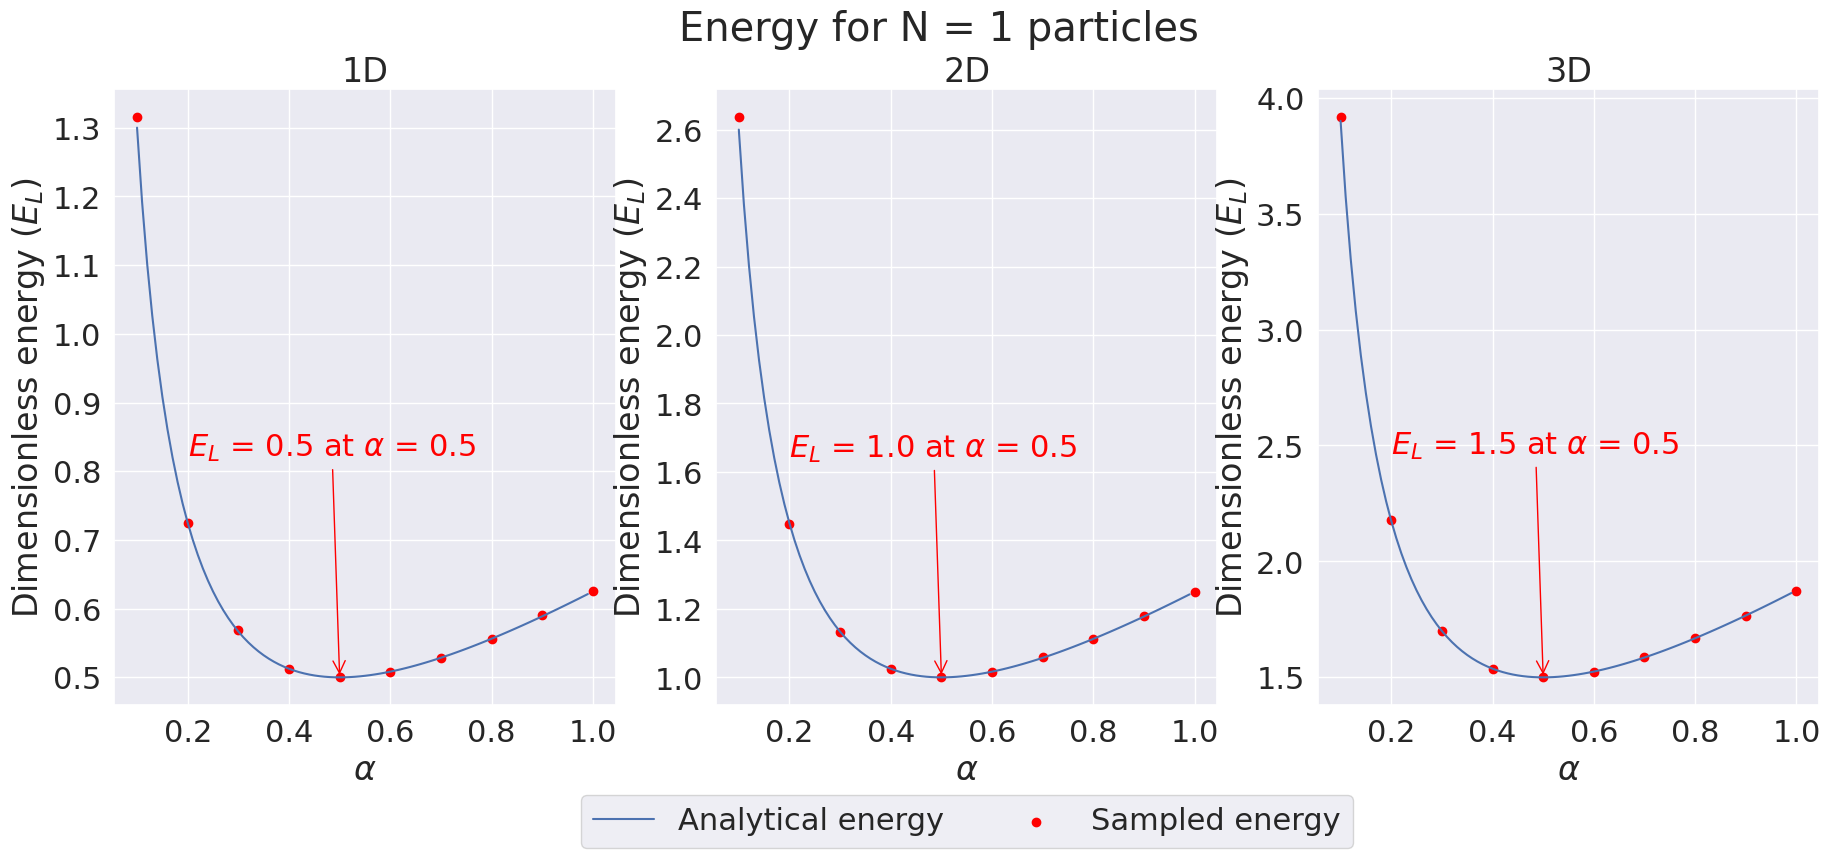

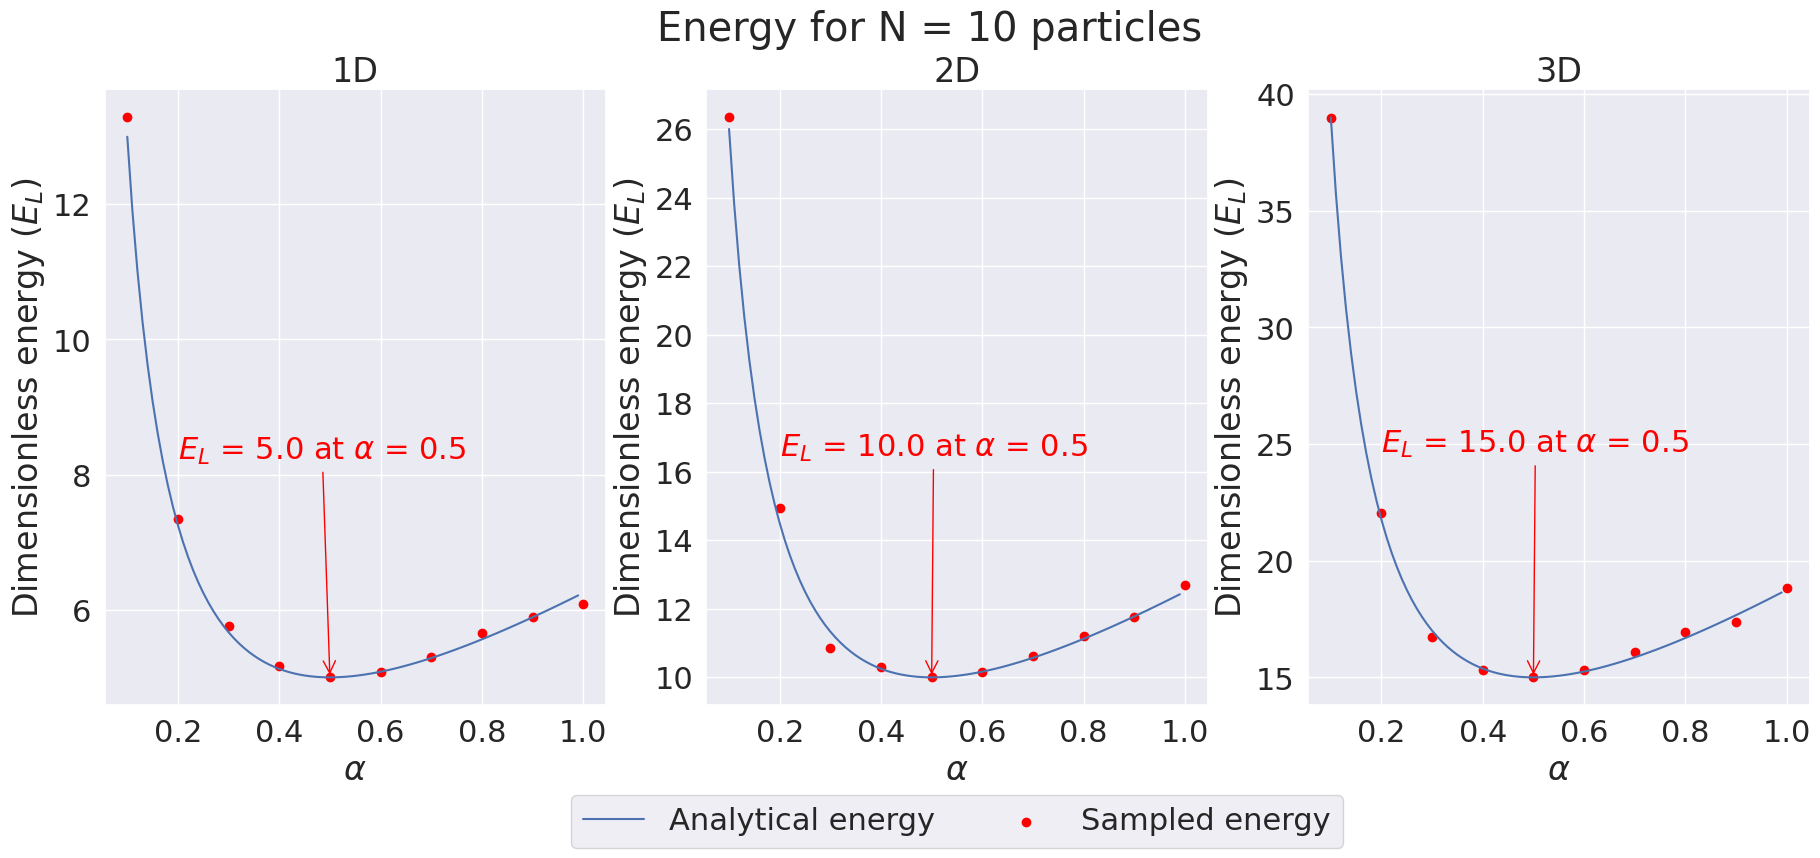

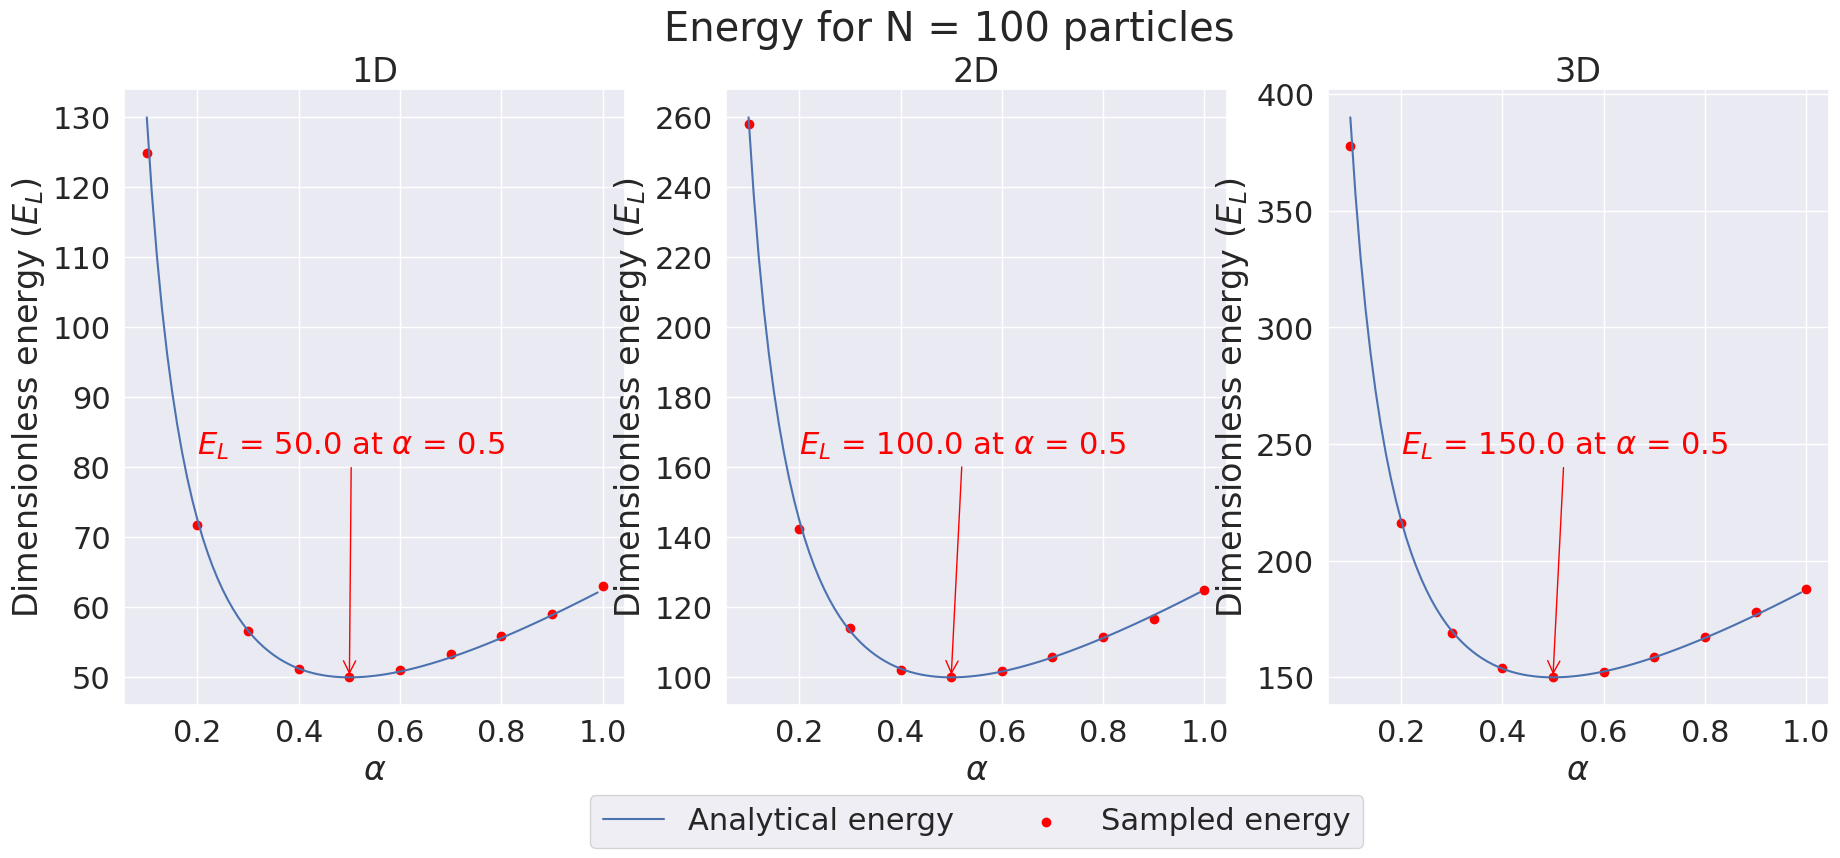

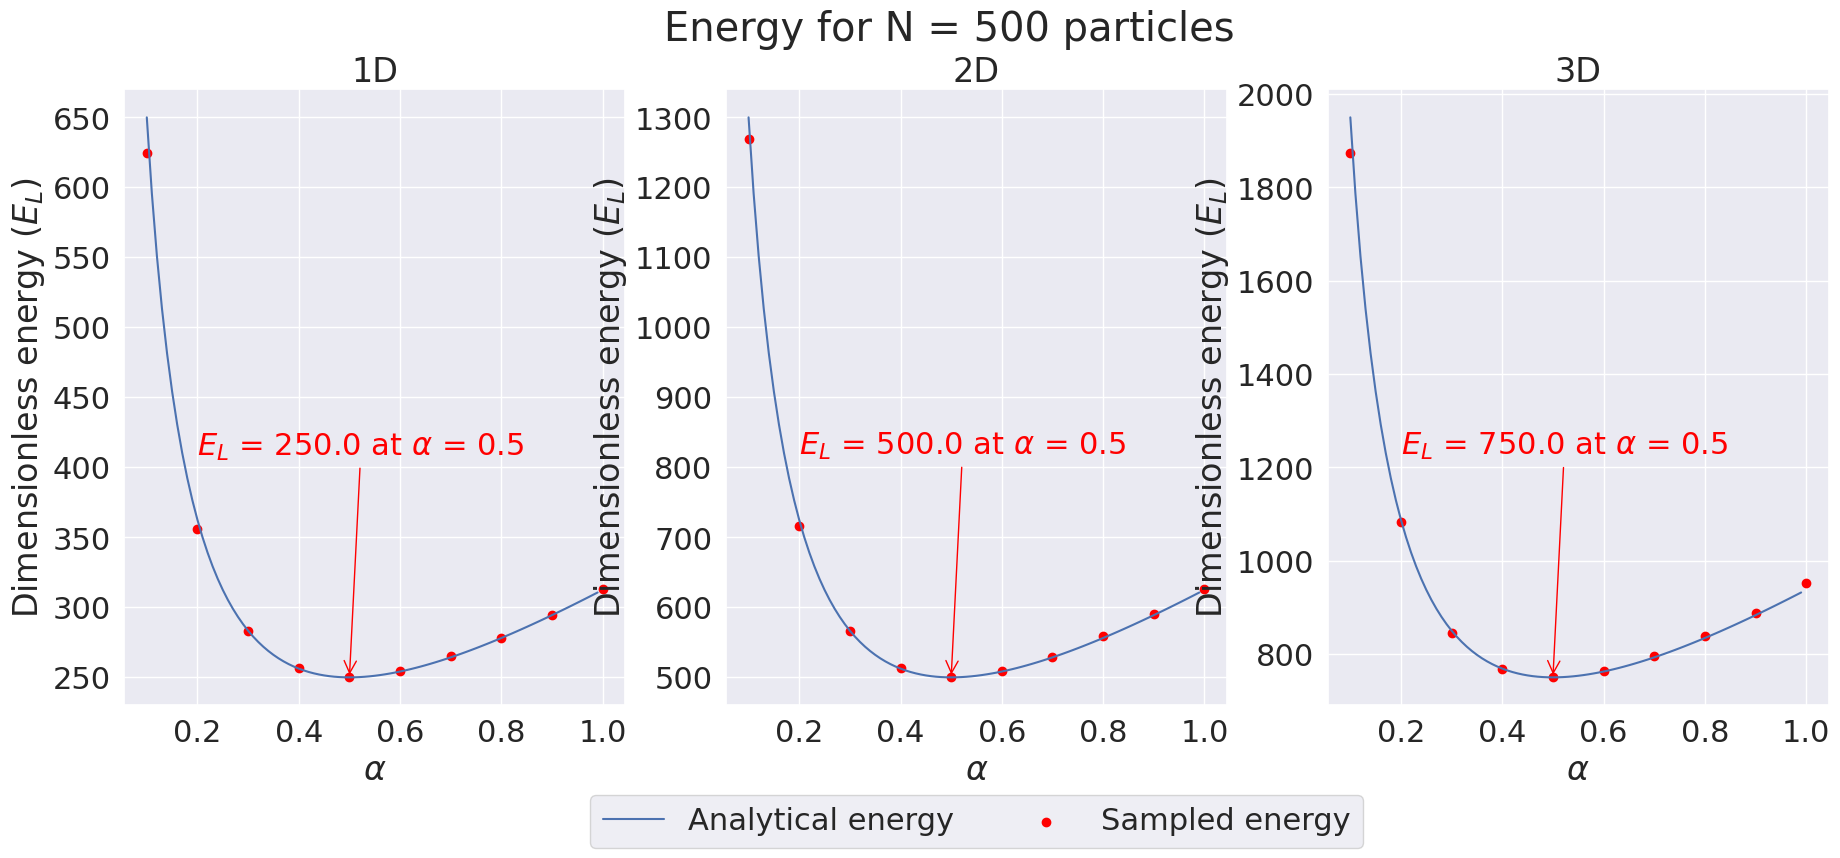

In [3]:
def analytical_energy(alpha, N_dim, N_particles):
    y = alpha/2 + 1/(8*alpha)
    return y*N_dim*N_particles
alpha = np.arange(0.1, 1, 0.01)
arrowprops = dict(arrowstyle="->", color = 'red')
for N in [1, 10, 100, 500]:
    fig, axs = plt.subplots(1, 3, figsize = (22, 8))
    for index, d in enumerate([1, 2, 3]):
        df = pd.read_csv(f'../output/N={N}_d={d}_ana_IS.csv')
        N_dim = df.d.iloc[0]
        N_particles = df.N.iloc[0]

        min_energy = df['energy'].min()
        min_alpha = df[df.energy == min_energy]['alpha'].iloc[0]
        
        axs[index].plot(alpha, analytical_energy(alpha, N_dim, N_particles), label = 'Analytical energy')
        axs[index].scatter(x = df['alpha'],y =  df['energy'], label = 'Sampled energy', color = 'red')
        axs[index].set_xlabel(r'$\alpha$')
        axs[index].set_ylabel(r'Dimensionless energy $(E_L)$')
        axs[index].annotate(r'$E_L$'+ f' = {min_energy} at '+r'$\alpha$'+f' = {min_alpha}',
                            xy=(min_alpha, min_energy), 
                            xytext=(min_alpha-0.3, min_energy+0.5*df.energy.mean()),
                            arrowprops=arrowprops, size = 22, color = 'red')
        axs[index].set_title(f'{d}D')
    tlt = fig.suptitle(f'Energy for N = {N_particles} particles')
    lgd = axs[1].legend(loc = 'upper center', ncol = 2, fancybox = True, bbox_to_anchor = (0.5, -0.12))
    #plt.savefig(f'N={N}_energy.pdf', bbox_extra_artists=(lgd,tlt), bbox_inches='tight')
    plt.show()

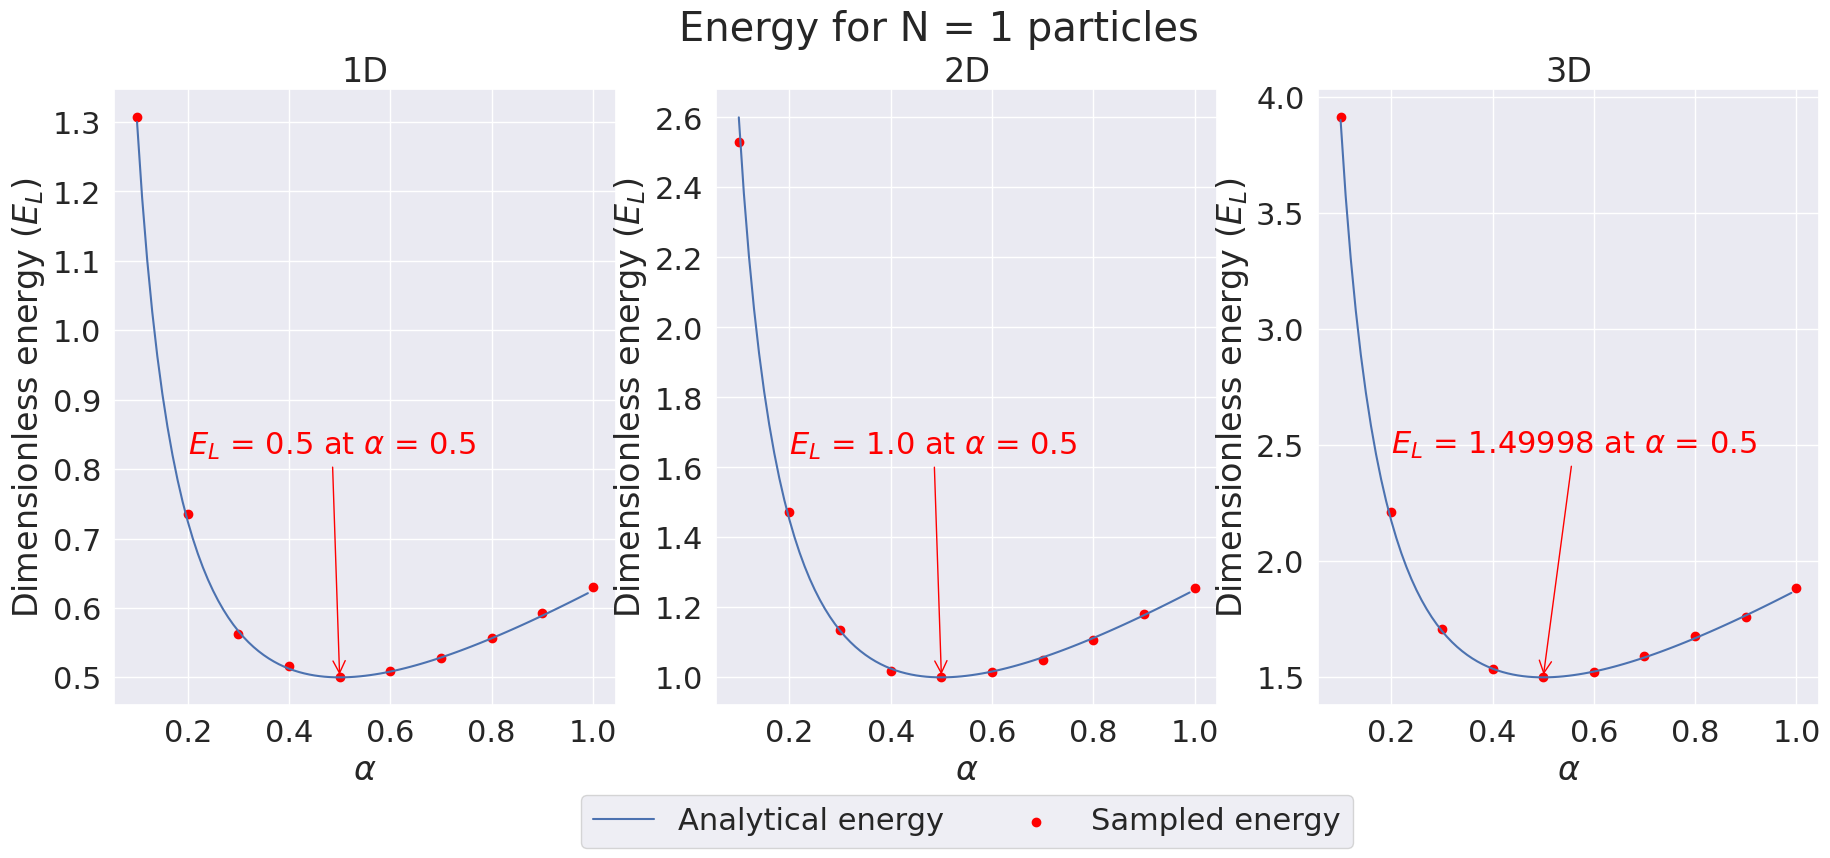

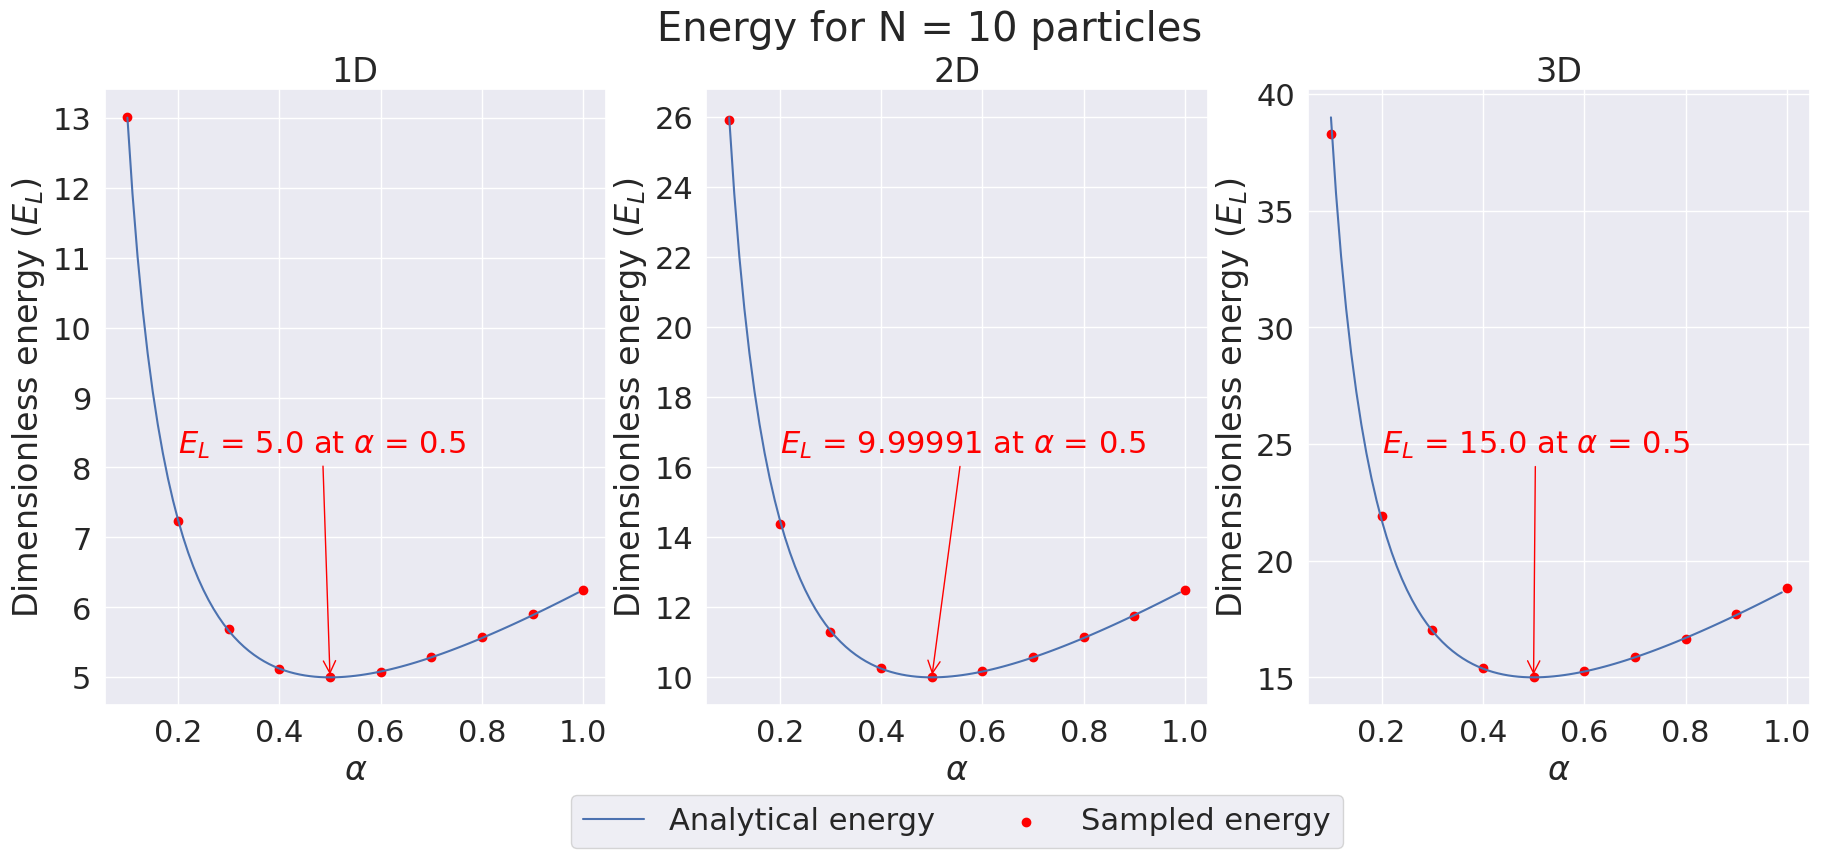

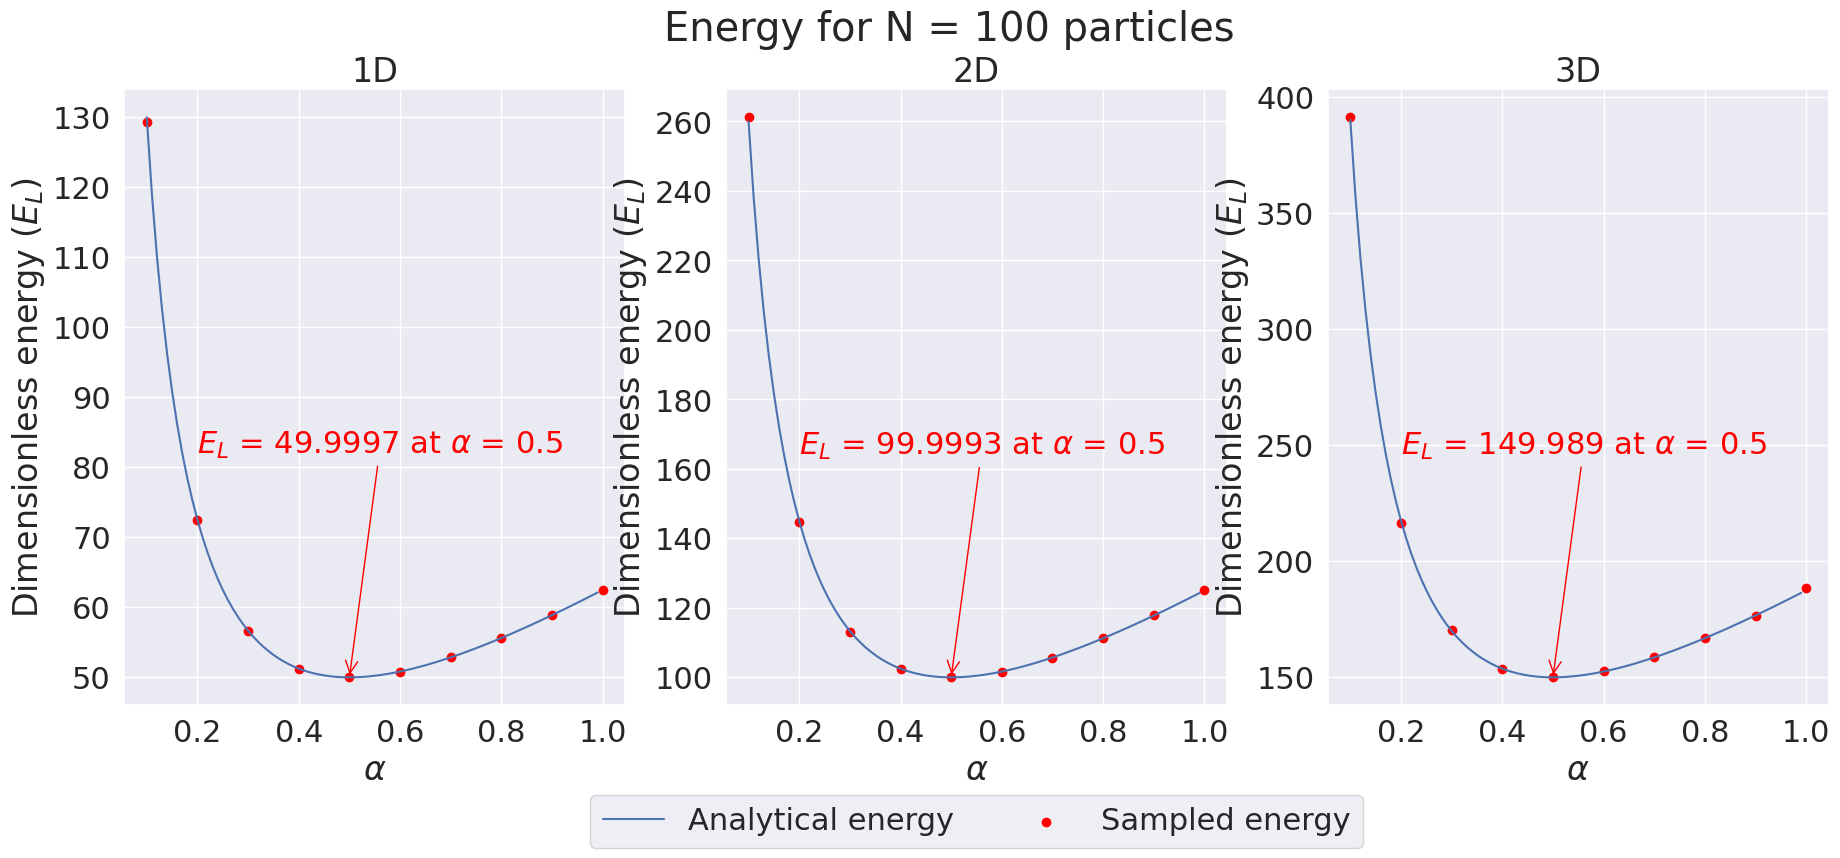

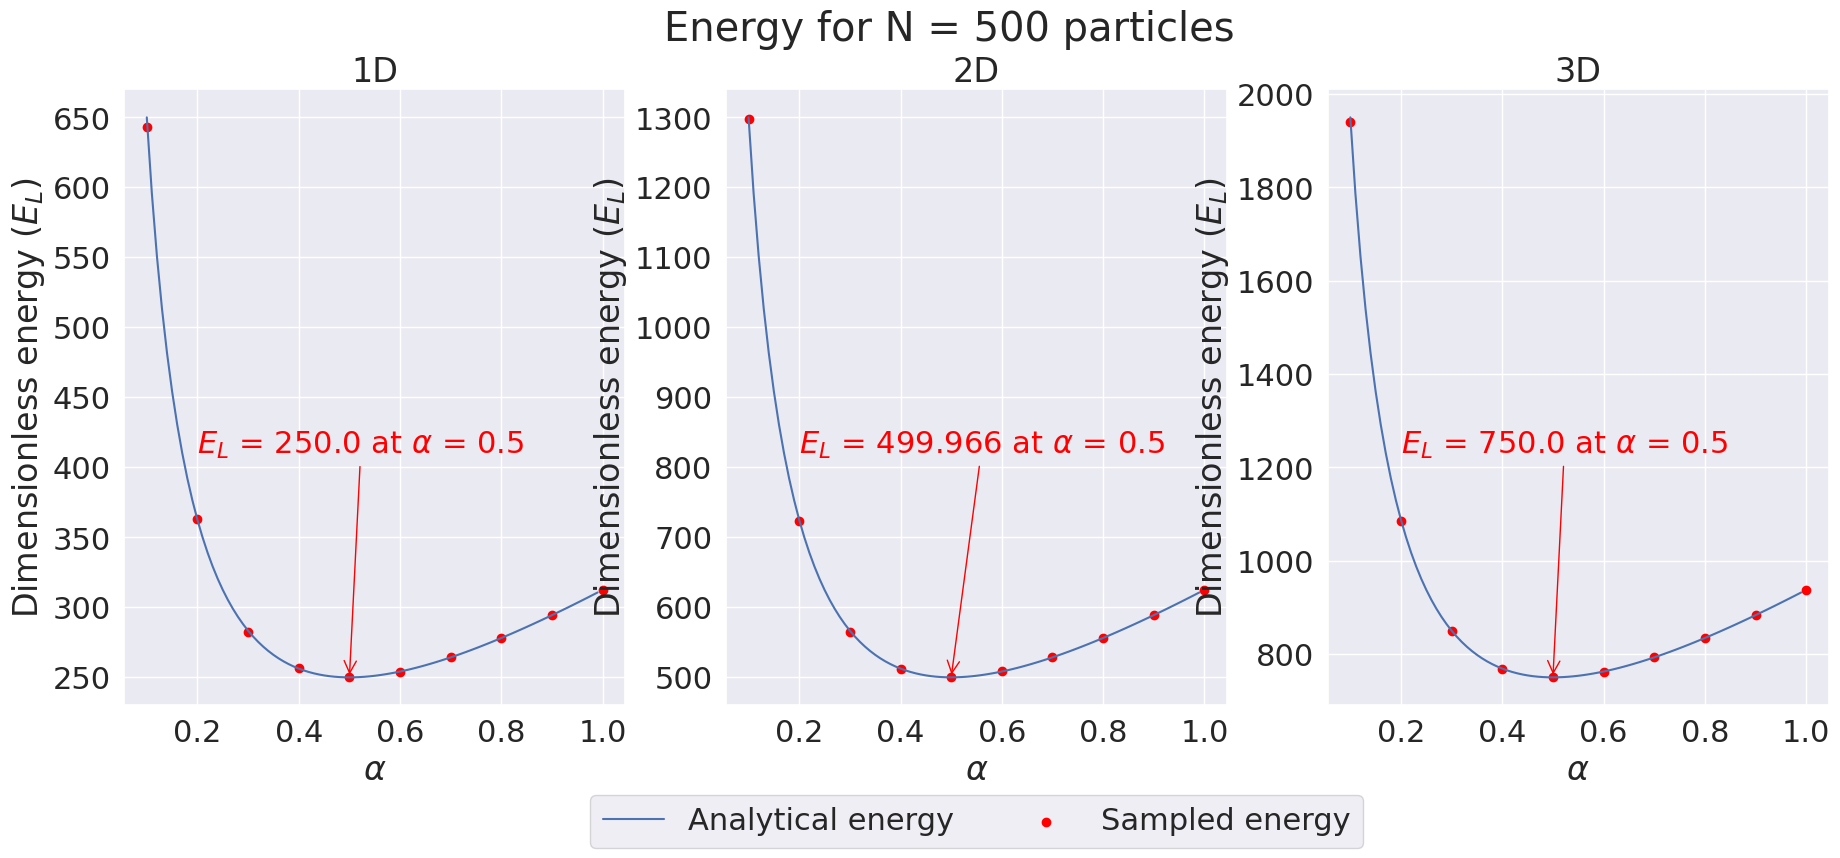

In [4]:
def analytical_energy(alpha, N_dim, N_particles):
    y = alpha/2 + 1/(8*alpha)
    return y*N_dim*N_particles
alpha = np.arange(0.1, 1, 0.01)
arrowprops = dict(arrowstyle="->", color = 'red')
for N in [1, 10, 100, 500]:
    fig, axs = plt.subplots(1, 3, figsize = (22, 8))
    for index, d in enumerate([1, 2, 3]):
        df = pd.read_csv(f'../output/N={N}_d={d}_num.csv')
        N_dim = df.d.iloc[0]
        N_particles = df.N.iloc[0]

        min_energy = df['energy'].min()
        min_alpha = df[df.energy == min_energy]['alpha'].iloc[0]
        
        axs[index].plot(alpha, analytical_energy(alpha, N_dim, N_particles), label = 'Analytical energy')
        axs[index].scatter(x = df['alpha'],y =  df['energy'], label = 'Sampled energy', color = 'red')
        axs[index].set_xlabel(r'$\alpha$')
        axs[index].set_ylabel(r'Dimensionless energy $(E_L)$')
        axs[index].annotate(r'$E_L$'+ f' = {min_energy} at '+r'$\alpha$'+f' = {min_alpha}',
                            xy=(min_alpha, min_energy), 
                            xytext=(min_alpha-0.3, min_energy+0.5*df.energy.mean()),
                            arrowprops=arrowprops, size = 22, color = 'red')
        axs[index].set_title(f'{d}D')
    tlt = fig.suptitle(f'Energy for N = {N_particles} particles')
    lgd = axs[1].legend(loc = 'upper center', ncol = 2, fancybox = True, bbox_to_anchor = (0.5, -0.12))
    #plt.savefig(f'N={N}_energy.pdf', bbox_extra_artists=(lgd,tlt), bbox_inches='tight')
    plt.show()

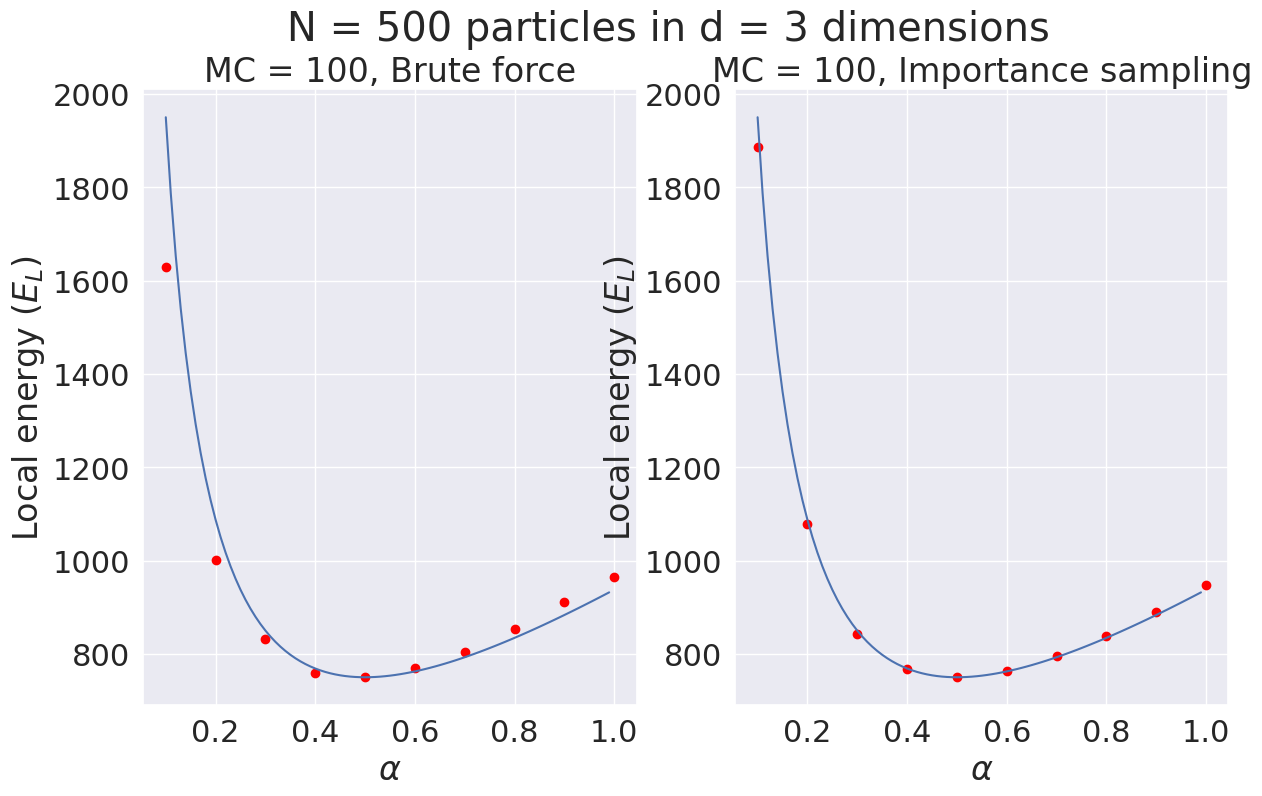

In [13]:
N = 500
d = 3
fig, axs = plt.subplots(1, 2, figsize = (14, 8))
titlename = ['Brute force', 'Importance sampling']
for index, name in enumerate([f'../output/N={N}_d={d}_ana.csv', f'../output/N={N}_d={d}_ana_IS.csv']):
    df = pd.read_csv(name)
    N_dim = df.d.iloc[0]
    N_particles = df.N.iloc[0]
    MC_cyles = df.MC.iloc[0]

    min_energy = df['energy'].min()
    min_alpha = df[df.energy == min_energy]['alpha'].iloc[0]

    axs[index].plot(alpha, analytical_energy(alpha, N_dim, N_particles), label = 'Analytical energy')
    axs[index].scatter(x = df['alpha'],y =  df['energy'], label = 'Sampled energy', color = 'red')
    axs[index].set_xlabel(r'$\alpha$')
    """axs[index].annotate(r'$E_L$'+ f' = {min_energy} at '+r'$\alpha$'+f' = {min_alpha}',
                        xy=(min_alpha, min_energy), 
                        xytext=(min_alpha-0.3, min_energy+0.5*df.energy.mean()),
                        arrowprops=arrowprops, size = 16, color = 'red')
    """
    axs[index].set_title(f'MC = {MC_cyles}, {titlename[index]}')
    fig.suptitle(f'N = {N_particles} particles in d = {d} dimensions')
    axs[index].set_ylabel(r'Local energy $(E_L)$')
#lgd = axs[0].legend(loc = 'upper center', ncol = 2, fancybox = True, bbox_to_anchor = (0.5, -0.12))
#fig.tight_layout()
plt.show()

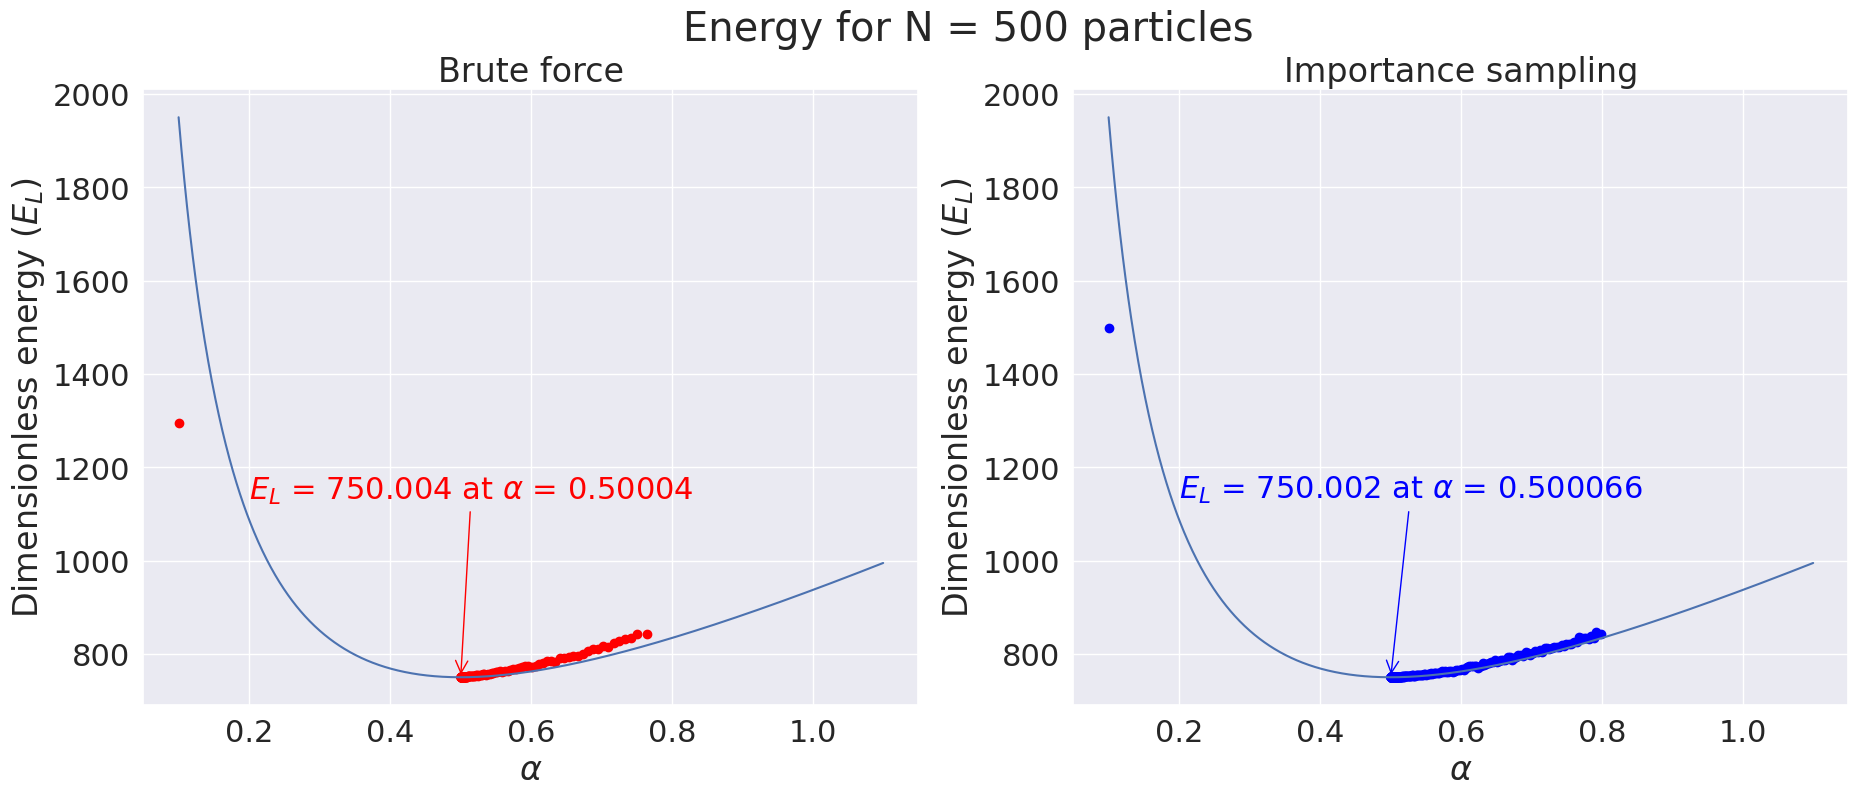

In [14]:
N = 500
d = 3
df_is = pd.read_csv(f'../output/N={N}_d={d}_GD_IS_energy.csv')
df = pd.read_csv(f'../output/N={N}_d={d}_GD_energy.csv')

fig, axs = plt.subplots(1, 2, figsize = (22, 8))
N_dim = df.d.iloc[0]
N_particles = df.N.iloc[0]


N_dim = df.d.iloc[0]
N_particles = df.N.iloc[0]

min_energy = df['energy'].iloc[-1]
min_alpha = df[df.energy == min_energy]['alpha'].iloc[0]

min_energy_is = df_is['energy'].iloc[-1]
min_alpha_is = df_is[df_is.energy == min_energy_is]['alpha'].iloc[0]

arrowprops = dict(arrowstyle="->", color = 'red')
arrowprops_is = dict(arrowstyle="->", color = 'blue')

alpha_plot = np.arange(0.1, 1.1, 0.001)
#axs.plot(alpha, analytical_energy(alpha, N_dim, N_particles), label = 'Analytical energy')
axs[0].scatter(df['alpha'], df['energy'], label = 'Brute force', color = 'red')
axs[1].scatter(df_is['alpha'], df_is['energy'], label = 'Importance sampling', color = 'blue')
axs[0].set_xlabel(r'$\alpha$')
axs[0].set_ylabel(r'Dimensionless energy $(E_L)$')
axs[1].set_xlabel(r'$\alpha$')
axs[1].set_ylabel(r'Dimensionless energy $(E_L)$')
axs[0].plot(alpha_plot, analytical_energy(alpha_plot, N_dim, N_particles), label = 'Analytical energy')
axs[1].plot(alpha_plot, analytical_energy(alpha_plot, N_dim, N_particles), label = 'Analytical energy')
axs[0].annotate(r'$E_L$'+ f' = {min_energy} at '+r'$\alpha$'+f' = {min_alpha}',
                    xy=(min_alpha, min_energy), 
                    xytext=(min_alpha-0.3, min_energy+0.5*df.energy.mean()),
                    arrowprops=arrowprops, size = 22, color = 'red')
axs[1].annotate(r'$E_L$'+ f' = {min_energy_is} at '+r'$\alpha$'+f' = {min_alpha_is}',
                    xy=(min_alpha_is, min_energy_is), 
                    xytext=(min_alpha_is-0.3, min_energy_is+0.5*df_is.energy.mean()),
                    arrowprops=arrowprops_is, size = 22, color = 'blue')

axs[0].set_title(f'Brute force')
axs[1].set_title(f'Importance sampling')
tlt = fig.suptitle(f'Energy for N = {N_particles} particles')
#lgd = axs.legend(loc = 'upper center', ncol = 2, fancybox = True, bbox_to_anchor = (0.5, -0.12))
#plt.savefig(f'N={N}_energy.pdf', bbox_extra_artists=(lgd,tlt), bbox_inches='tight')
plt.show()

In [26]:
df = pd.read_csv(f'../output/N=10_d=3_int_IS.csv')
df['sigma'] = np.sqrt(df['variance'])
display(df)

,MC,N,d,alpha,energy,variance,sigma
0,1000,10,3,0.1,1203.9800,3.256160e+02,18.044833
1,1000,10,3,0.2,2017.6100,3.089090e+03,55.579583
2,1000,10,3,0.3,580.6070,4.039720e+02,20.099055
3,1000,10,3,0.4,196.2490,4.744760e+01,6.888222
4,1000,10,3,0.5,24.1676,6.758770e-08,0.000260
5,1000,10,3,0.6,-406.9800,4.315010e+01,6.568874
6,1000,10,3,0.7,-1331.4000,5.548680e+02,23.555636
7,1000,10,3,0.8,-1622.1600,7.431700e+02,27.261145
8,1000,10,3,0.9,-1896.8500,3.330910e+03,57.714036
9,1000,10,3,1.0,-3831.9200,2.785260e+03,52.775563


In [30]:
df = pd.read_csv(f'../output/N=10_d=3_int.csv')
df['sigma'] = np.sqrt(df['variance'])
display(df)

,MC,N,d,alpha,energy,variance,sigma
0,1000000,10,3,0.1,63.0095,290.165,17.034230
1,1000000,10,3,0.2,35.3593,516.727,22.731630
2,1000000,10,3,0.3,27.6532,133.012,11.533083
3,1000000,10,3,0.4,25.0790,820.579,28.645750
4,1000000,10,3,0.5,24.4997,124.479,11.157016
5,1000000,10,3,0.6,24.9949,496.965,22.292712
6,1000000,10,3,0.7,26.0896,1742.310,41.740987
7,1000000,10,3,0.8,27.4794,688.689,26.242885
8,1000000,10,3,0.9,29.1037,1473.670,38.388410
9,1000000,10,3,1.0,31.0888,10633.700,103.119833


[]

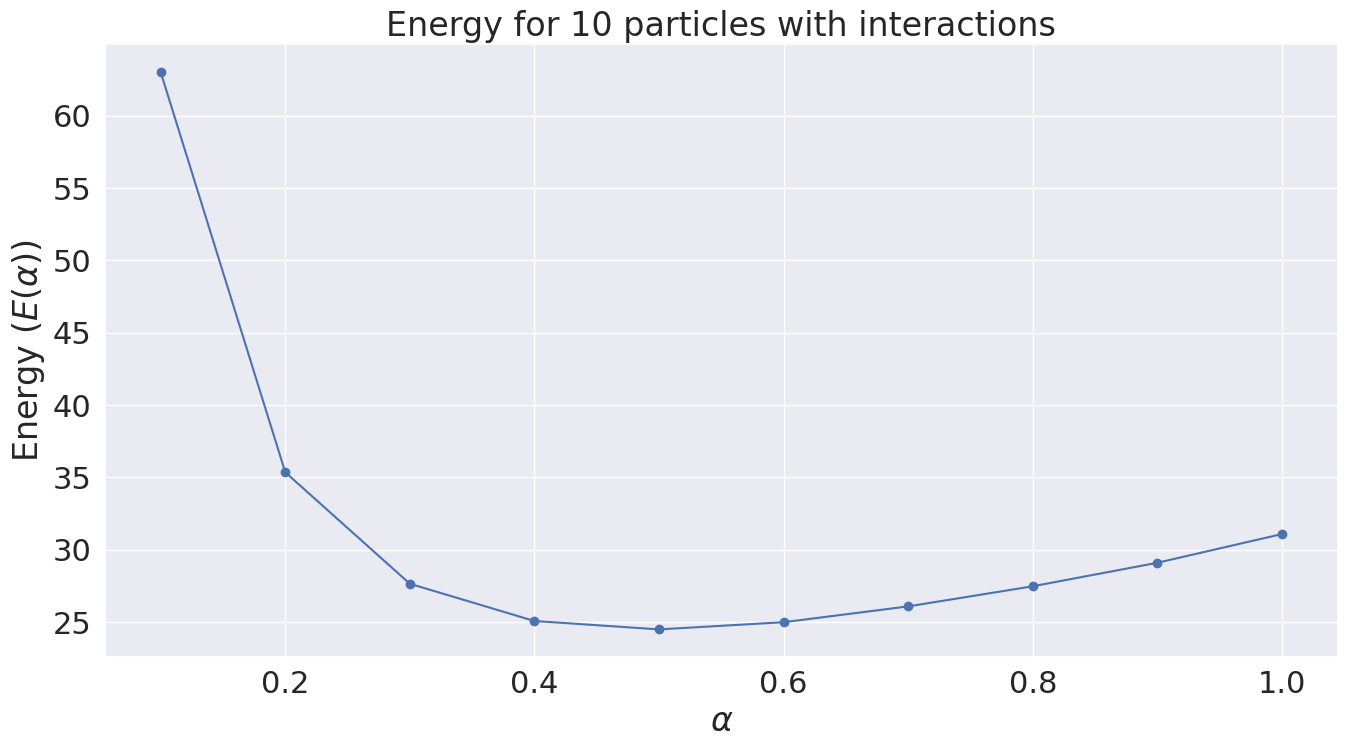

In [33]:
fig, axs = plt.subplots(1, 1, figsize = (14, 8))
axs.scatter(df.alpha, df.energy)
axs.plot(df.alpha, df.energy)
axs.set_xlabel(r'$\alpha$')
axs.set_ylabel(r'Energy $(E(\alpha))$')
axs.set_title(f'Energy for 10 particles with interactions')
fig.tight_layout()
plt.plot()

[]

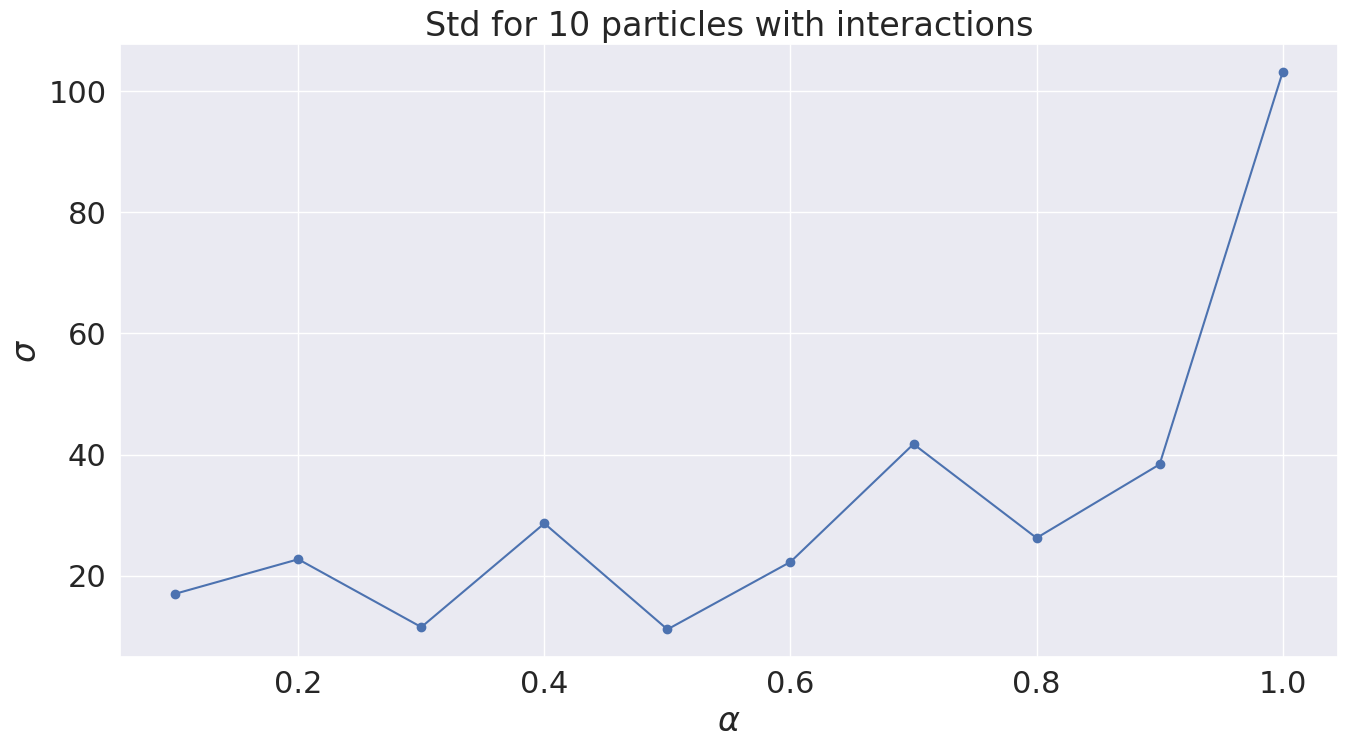

In [34]:
fig, axs = plt.subplots(1, 1, figsize = (14, 8))
axs.scatter(df.alpha, df.sigma)
axs.plot(df.alpha, df.sigma)
axs.set_xlabel(r'$\alpha$')
axs.set_ylabel(r'$\sigma$')
axs.set_title(f'Std for 10 particles with interactions')
fig.tight_layout()
plt.plot()

In [18]:
df = pd.read_csv(f'../output/N=10_d=3_int_IS.csv')
df['sigma'] = np.sqrt(df['variance'])
display(df)

,MC,N,d,alpha,energy,variance,sigma
0,100000,10,3,0.1,6560.7600,569033.000000,754.342760
1,100000,10,3,0.2,3914.3400,148820.000000,385.771953
2,100000,10,3,0.3,2003.5000,145881.000000,381.943713
3,100000,10,3,0.4,902.2820,14791.600000,121.620722
4,100000,10,3,0.5,24.1626,0.000005,0.002271
5,100000,10,3,0.6,-629.8440,13218.800000,114.973040
6,100000,10,3,0.7,-914.1740,24795.600000,157.466187
7,100000,10,3,0.8,-2157.1000,58073.400000,240.984232
8,100000,10,3,0.9,-2492.5300,44289.000000,210.449519
9,100000,10,3,1.0,-2223.8900,41041.600000,202.587265


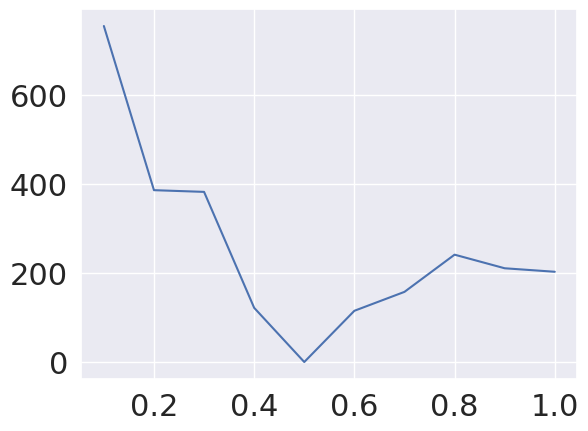

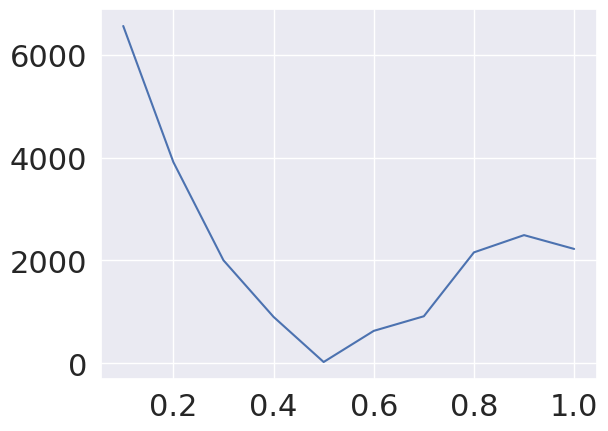

In [22]:
plt.plot(df.alpha, df.sigma)
plt.show()
plt.plot(df.alpha, abs(df.energy))
plt.show()